# Validation using DIGEST

Notebook to recreate the results presented in the paper. Keep in mind, that the results can slighty differentiate as the random background will not create the exact same random sets as before. 

## Setup

In [1]:
import os
import sys
import json
import pandas as pd
from IPython.display import IFrame
# ==== import DIGEST python package called biodigest ==== 
from biodigest.single_validation import single_validation, save_results
from biodigest.evaluation.d_utils.plotting_utils import create_plots

import warnings
warnings.filterwarnings("ignore")

If it is the first time that this package is used after installation, make sure that setup has been run before to have all required files.

In [2]:
from biodigest import setup
setup.main(setup_type="api")

[00:00:02|165.30MB] Starting Setup ...
[00:00:02|165.30MB] Get id and attribute mappings ...
[00:00:03|181.07MB] Get distance mappings ...
[00:00:03|181.07MB] Get distance mappings for jaccard ...
[00:00:23|277.58MB] Get distance mappings for overlap ...
[00:00:38|307.80MB] Finished Setup ...


## Cluster itself

Compare a target cluster of diseases or genes based on dunn index, sillhouette score or david bouldin index, while the random runs are simply cluster size preserving perturbation of cluster assignments.

## Gene Cluster

### Set input parameters

#### Required input

In [3]:
# ==== define required input ====
tar_cluster = pd.read_csv("input/target_gene_cluster.txt", header=None, sep="\t", dtype=str, names=["id", "cluster", "desc"])
tar_id_type = "symbol"
mode = "cluster"

#### Optional input (Default parameters are set)

In [4]:
# ==== define optional input influencing results ====
distance_measure="jaccard" # which distance measure should be chosen. Choice between jaccard and overlap
background_model="complete" # the only background model for clustering
runs = 1000 # how many random runs for empirical p-value estimation
perc = 100 # how many % of the original input should be perturbated for the background model

# ==== define optional input influencing saving of results ====
out_dir = "results/gene_cluster/" 
verbose=True # printing additional information during the run
prefix="cluster_gene_symbol_complete"

### Run script

In [5]:
results = single_validation(tar=tar_cluster, tar_id=tar_id_type, mode=mode, background_model=background_model, 
                            runs=runs, replace=perc, verbose=verbose, distance=distance_measure)

[00:00:00|308.16MB] Check for proper setup ...
[00:00:00|308.16MB] Starting validation ...
[00:00:00|308.16MB] Load mappings for input into cache ...
[00:00:02|657.54MB] Load distances for input into cache ...
[00:00:13|2449.88MB] Load input data ...
[00:00:13|2450.71MB] Validation of input ...
Missing values for pathway.kegg :9/20
[00:00:13|2450.71MB] Validation of random runs ...
[00:06:55|2452.73MB] Finished validation


### Inspect results

Check all P-values

In [6]:
pd.DataFrame(results["p_values"]['values'])

,DI-based,SS-based,DBI-based
GO.BP,0.121878,0.125874,0.124875
GO.CC,0.820180,0.240759,0.247752
GO.MF,0.748252,0.296703,0.303696
KEGG,0.689311,0.359640,0.357642


Check validation values of input cluster

In [7]:
pd.DataFrame(results["input_values"]['values'])

,DI-based,SS-based,DBI-based
GO.BP,0.989928,0.015676,0.982069
GO.CC,0.987647,0.076410,0.925316
GO.MF,0.981591,0.084761,0.919973
KEGG,0.978832,0.047343,0.959126


### Save results

#### Save full results as json and upper two tables as csv

In [8]:
save_results(results=results, prefix=prefix, out_dir=out_dir)

#### Create visualization

If flag for plot was set, you can see a plot with the p-values for every attribute and a mappability plot showing how many of the input ids had assigned values per attribute.

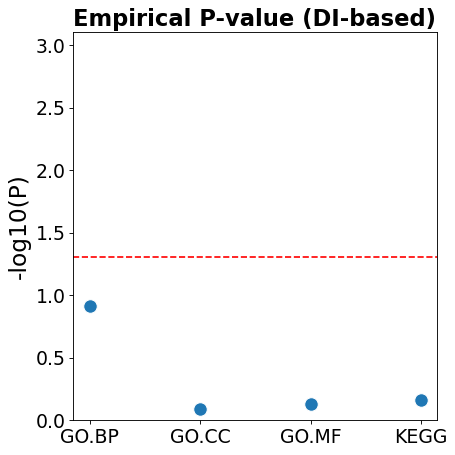

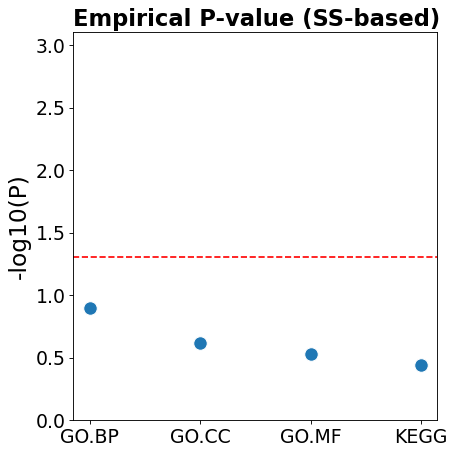

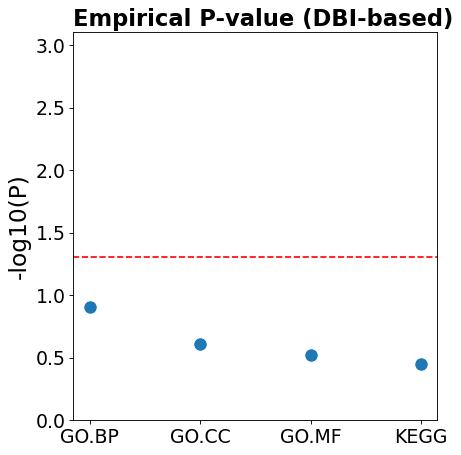

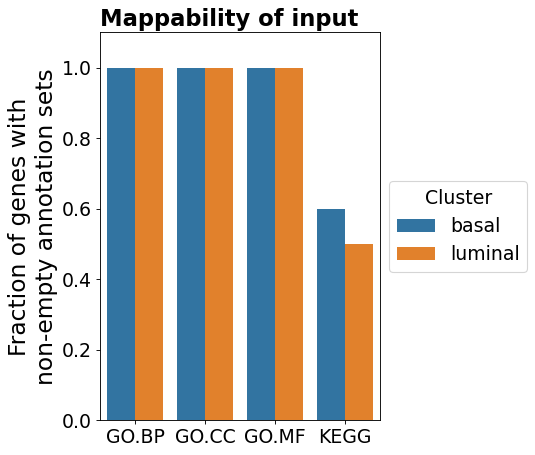

In [9]:
create_plots(results=results, mode=mode, tar=tar_cluster, tar_id=tar_id_type, out_dir=out_dir, prefix=prefix)

Keep in mind, that after plotting, the resulting plots are also saved in the output directory.

## Disease Cluster

### Set input parameters

#### Required input

In [10]:
# ==== define required input ====
tar_cluster = pd.read_csv("input/target_disease_cluster.txt", header=None, sep="\t", dtype=str, names=["id", "cluster", "desc"])
tar_id_type = "ICD-10"
mode = "cluster"

#### Optional input (Default parameters are set)

In [11]:
# ==== define optional input influencing results ====
distance_measure="jaccard" # which distance measure should be chosen. Choice between jaccard and overlap
background_model="complete" # the only background model for clustering
runs = 1000 # how many random runs for empirical p-value estimation
perc = 100 # how many % of the original input should be perturbated for the background model

# ==== define optional input influencing saving of results ====
out_dir = "results/disease_cluster/" 
verbose=True # printing additional information during the run
prefix="cluster_disease_ICD-10_complete"

### Run script

In [12]:
results = single_validation(tar=tar_cluster, tar_id=tar_id_type, mode=mode, background_model=background_model, 
                            runs=runs, replace=perc, verbose=verbose, distance=distance_measure)

[00:00:00|2458.66MB] Check for proper setup ...
[00:00:00|2458.66MB] Starting validation ...
[00:00:00|2458.66MB] Load mappings for input into cache ...
[00:00:02|2457.93MB] Load distances for input into cache ...
[00:00:03|2682.46MB] Load input data ...
[00:00:03|2682.46MB] Validation of input ...
Missing values for disgenet.genes_related_to_disease :2/64
Missing values for disgenet.variants_related_to_disease :7/64
Missing values for ctd.pathway_related_to_disease :18/64
[00:00:03|2683.56MB] Validation of random runs ...
[00:16:34|2684.38MB] Finished validation


### Inspect results

Check all P-values

In [13]:
pd.DataFrame(results["p_values"]['values'])

,DI-based,SS-based,DBI-based
related_genes,0.157842,0.998002,0.317682
related_variants,0.009990,0.785215,0.048951
KEGG,0.174825,0.953047,0.753247


Check validation values of input cluster

In [14]:
pd.DataFrame(results["input_values"]['values'])

,DI-based,SS-based,DBI-based
related_genes,-17.968934,3.762721,4.062091
related_variants,-4.156135,2.558102,3.394804
KEGG,-20.545225,3.041018,8.270698


### Save results

#### Save full results as json and upper two tables as csv

In [15]:
save_results(results=results, prefix=prefix, out_dir=out_dir)

#### Create visualization

If flag for plot was set, you can see a plot with the p-values for every attribute and a mappability plot showing how many of the input ids had assigned values per attribute.

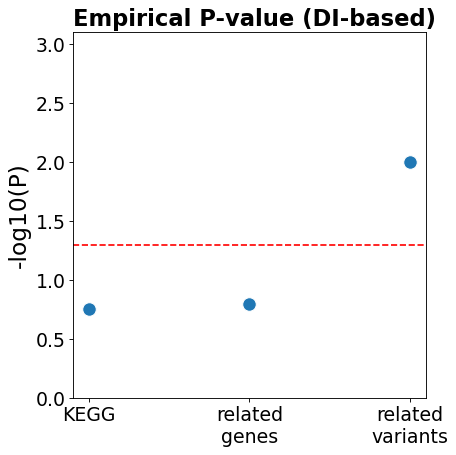

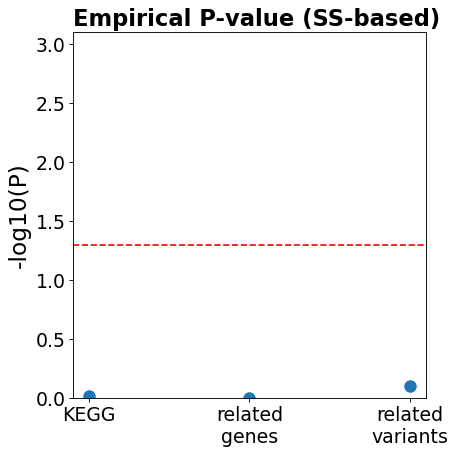

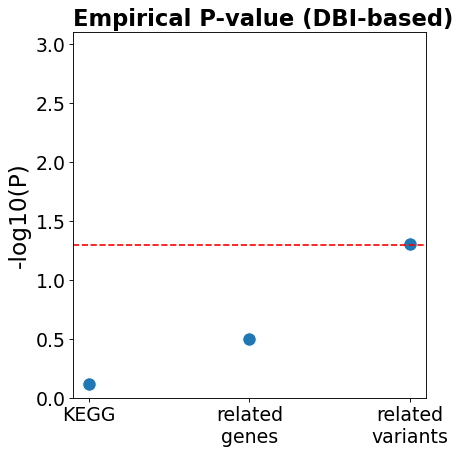

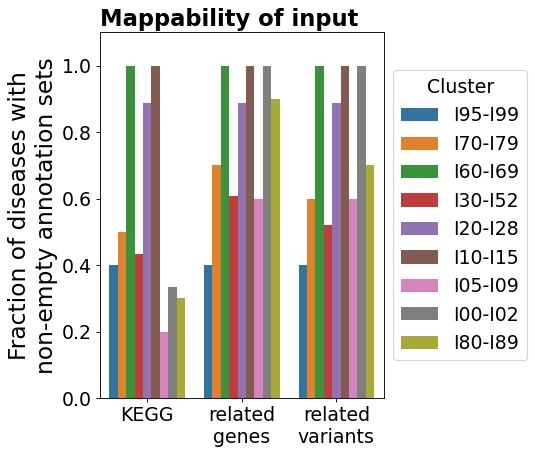

In [16]:
create_plots(results=results, mode=mode, tar=tar_cluster, tar_id=tar_id_type, out_dir=out_dir, prefix=prefix)

Keep in mind, that after plotting, the resulting plots are also saved in the output directory.

## Set itself

Validate a set by reference, either reference set or id, or reference-free. Two background models can be used. 

## Disease Set

### Set input parameters

#### Required input

In [17]:
# ==== define required input ====
tar_set = pd.read_csv("input/target_disease_set.txt", header=None, sep="\t", dtype=str)[0]
tar_id_type = "mesh"
mode = "set"

#### Optional input (Default parameters are set)

In [18]:
# ==== define optional input influencing results ====
distance_measure="jaccard" # which distance measure should be chosen. Choice between jaccard and overlap
background_model="term-pres" # the only background model for clustering
runs = 1000 # how many random runs for empirical p-value estimation
perc = 100 # how many % of the original input should be perturbated for the background model

# ==== define optional input influencing saving of results ====
out_dir = "results/disease_set/" 
verbose=True # printing additional information during the run
prefix="set_disease_mesh_term-pres"

### Run script

In [19]:
results = single_validation(tar=tar_set, tar_id=tar_id_type, mode=mode, background_model=background_model, 
                            runs=runs, replace=perc, verbose=verbose, distance=distance_measure)

[00:00:00|2684.38MB] Check for proper setup ...
[00:00:00|2684.38MB] Starting validation ...
[00:00:00|2684.38MB] Load mappings for input into cache ...
[00:00:02|2736.12MB] Load distances for input into cache ...
[00:00:03|2735.92MB] Validation of input ...
[00:00:03|2735.92MB] Validation of random runs ...
[00:01:12|2736.79MB] Calculating p-values ...
[00:01:12|2736.79MB] Finished validation


### Inspect results

Check all P-values

In [20]:
pd.DataFrame(results["p_values"]['values'])

,JI-based
KEGG,0.031968
related_genes,0.035964
related_variants,0.010989


Check validation values of input cluster

In [21]:
pd.DataFrame(results["input_values"]['values'])

,JI-based
KEGG,-2.926356
related_genes,-0.694796
related_variants,0.724962


### Save results

#### Save full results as json and upper two tables as csv

In [22]:
save_results(results=results, prefix=prefix, out_dir=out_dir)

#### Create visualization

If flag for plot was set, you can see a plot with the p-values for every attribute and a mappability plot showing how many of the input ids had assigned values per attribute.

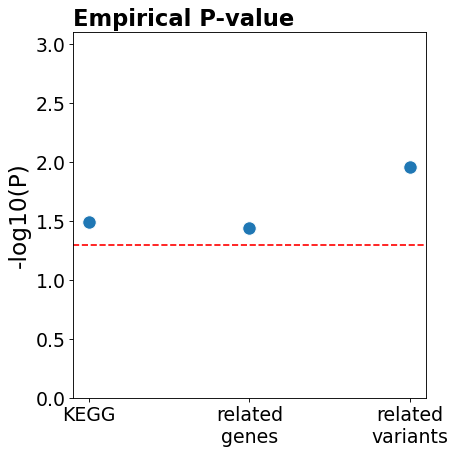

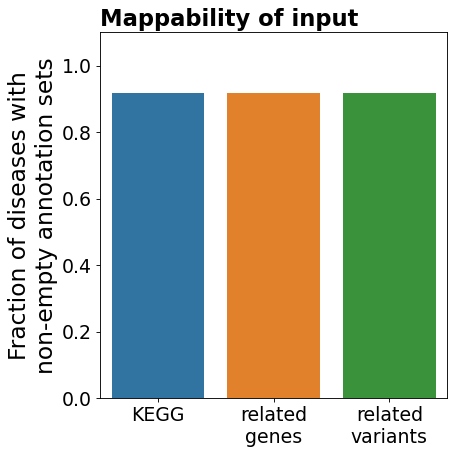

In [23]:
create_plots(results=results, mode=mode, tar=tar_set, tar_id=tar_id_type, out_dir=out_dir, prefix=prefix)

## Gene Set

### Set input parameters

#### Required input

In [24]:
# ==== define required input ====
tar_set = pd.read_csv("input/target_gene_set.txt", header=None, sep="\t", dtype=str)[0]
tar_id_type = "symbol"
ref_set = pd.read_csv("input/reference_gene_set.txt", header=None, sep="\t", dtype=str)[0]
ref_id_type = "symbol"
mode = "set-set"

#### Optional input (Default parameters are set)

In [25]:
# ==== define optional input influencing results ====
distance_measure="jaccard" # which distance measure should be chosen. Choice between jaccard and overlap
background_model="term-pres" # the only background model for clustering
runs = 1000 # how many random runs for empirical p-value estimation
perc = 100 # how many % of the original input should be perturbated for the background model
enriched=True

# ==== define optional input influencing saving of results ====
out_dir = "results/gene_set/" 
verbose=True # printing additional information during the run
prefix="set-set_gene_symbol_term-pres"

### Run script

In [26]:
results = single_validation(tar=tar_set, tar_id=tar_id_type, ref=ref_set, ref_id=ref_id_type, mode=mode, 
                            runs=runs, background_model=background_model, verbose=verbose, enriched=enriched, 
                            distance=distance_measure)

[00:00:00|2724.87MB] Check for proper setup ...
[00:00:00|2724.87MB] Starting validation ...
[00:00:00|2724.87MB] Load mappings for input into cache ...
[00:00:18|2751.32MB] Validation of input ...
[00:00:18|2751.32MB] Validation of random runs ...
[00:02:24|2752.21MB] Calculating p-values ...
[00:02:24|2752.21MB] Finished validation


### Inspect results

Check all P-values

In [27]:
pd.DataFrame(results["p_values"]['values'])

,JI-based
GO.BP,0.000999
GO.CC,0.000999
GO.MF,0.004995
KEGG,1.000000


Check validation values of input cluster

In [28]:
pd.DataFrame(results["input_values"]['values'])

,JI-based
GO.BP,0.625
GO.CC,0.65
GO.MF,0.35
KEGG,0.0


### Save results

#### Save full results as json and upper two tables as csv

In [29]:
save_results(results=results, prefix=prefix, out_dir=out_dir)

#### Create visualization

If flag for plot was set, you can see a plot with the p-values for every attribute and a mappability plot showing how many of the input ids had assigned values per attribute.

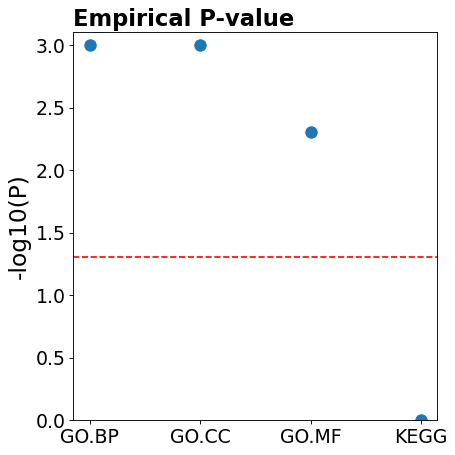

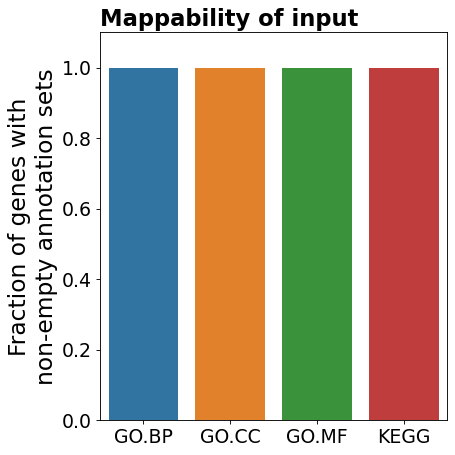

In [30]:
create_plots(results=results, mode=mode, tar=tar_set, tar_id=tar_id_type, out_dir=out_dir, prefix=prefix)